# QAOA for Max Cut, Toy Example
In this notebook the QAOA method is used to solve a small max cut problem. The quantum circuit used is shown and the approximation ratio for depth = 1 is  computed.

In [3]:
from qaoa import QAOA, problems, mixers, initialstates

In [4]:
import numpy as np
import matplotlib.pyplot as pl
import networkx as nx
import sys

sys.path.append("../")
from plotroutines import *

Creating problem instance

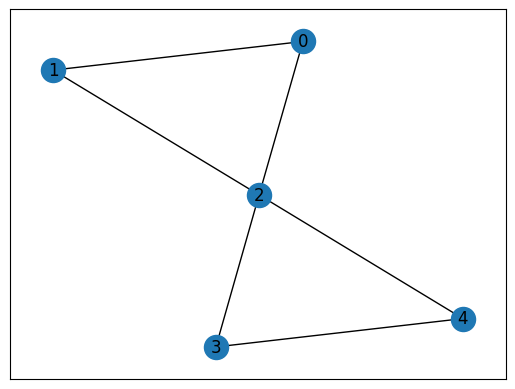

In [5]:
G = nx.Graph()
G.add_nodes_from(np.arange(0, 5, 1))
G.add_weighted_edges_from(
    [(0, 1, 1.0), (0, 2, 1.0), (1, 2, 1.0), (3, 2, 1.0), (3, 4, 1.0), (4, 2, 1.0)]
)

pos = nx.spring_layout(G)
nx.draw_networkx(G, pos=pos)

Creating a QAOA instance and drawing the quantum circuit

In [22]:
qaoa = QAOA(
    initialstate=initialstates.Plus(), problem=problems.MaxKCutBinaryPowerOfTwo(G=G, k_cuts = 2), mixer=mixers.X()
)

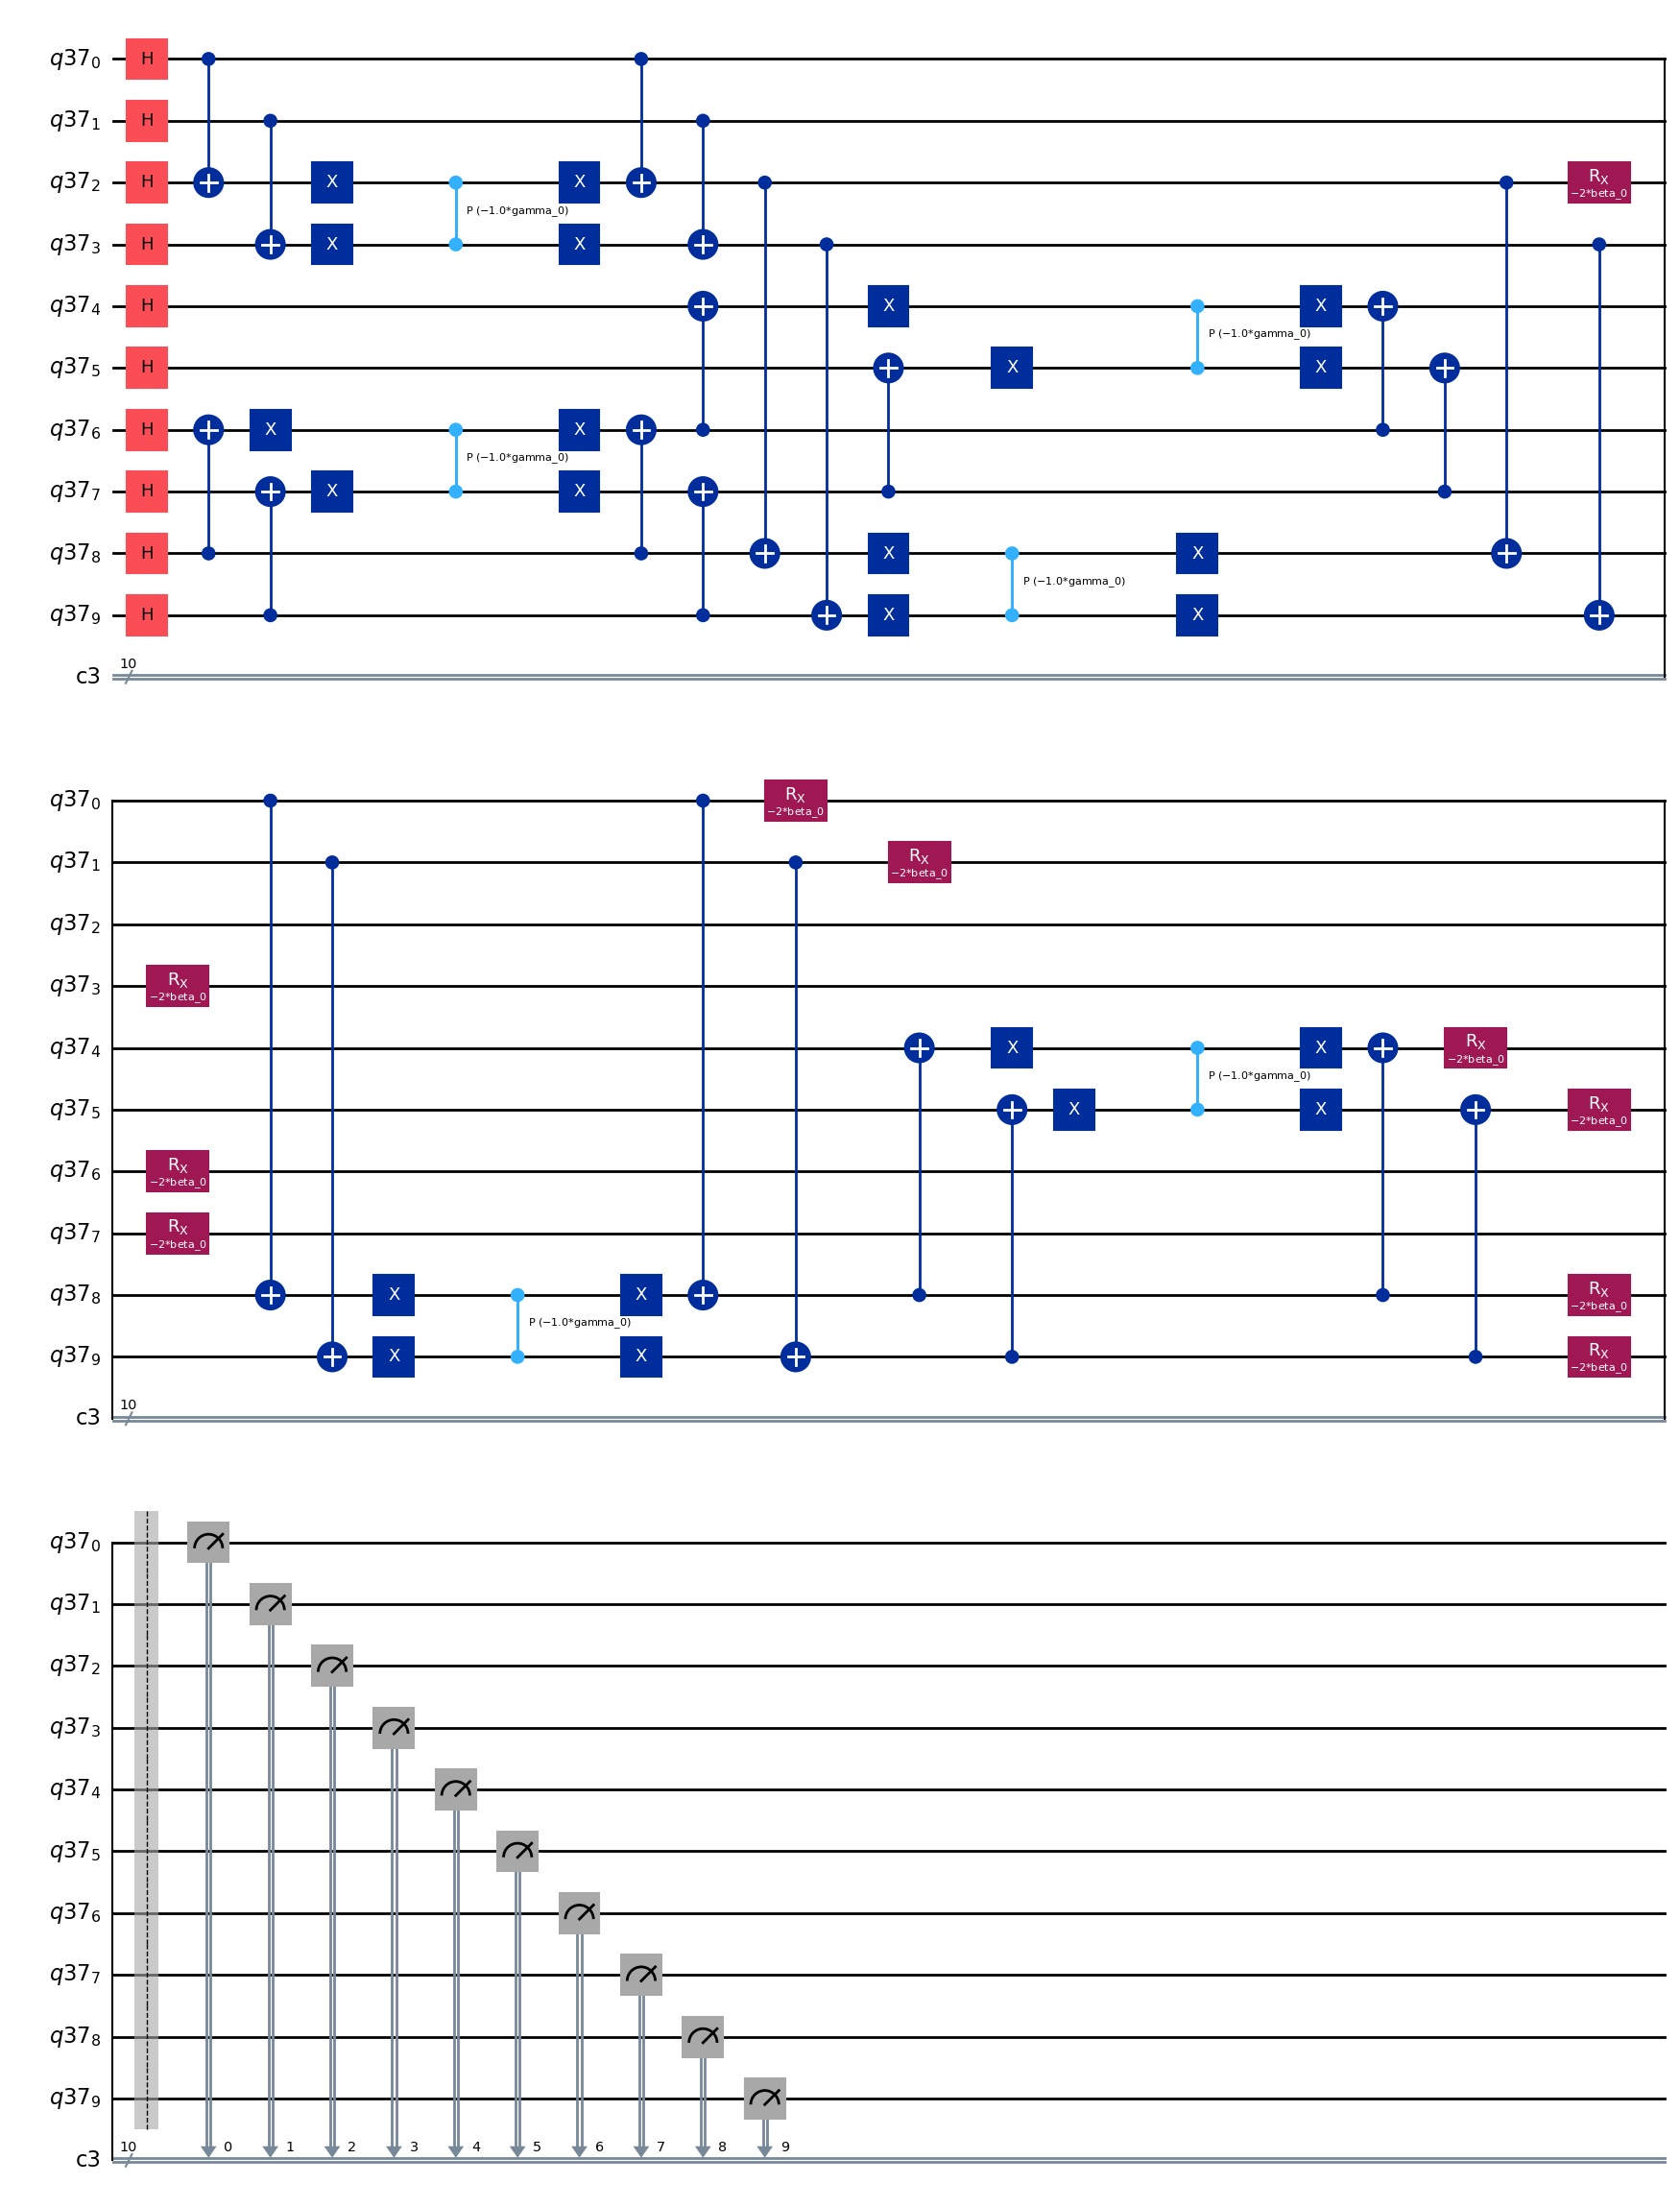

In [16]:
qaoa.createParameterizedCircuit(1)
qaoa.parameterized_circuit.draw(output="mpl")

circuits can also be drawn individually like this

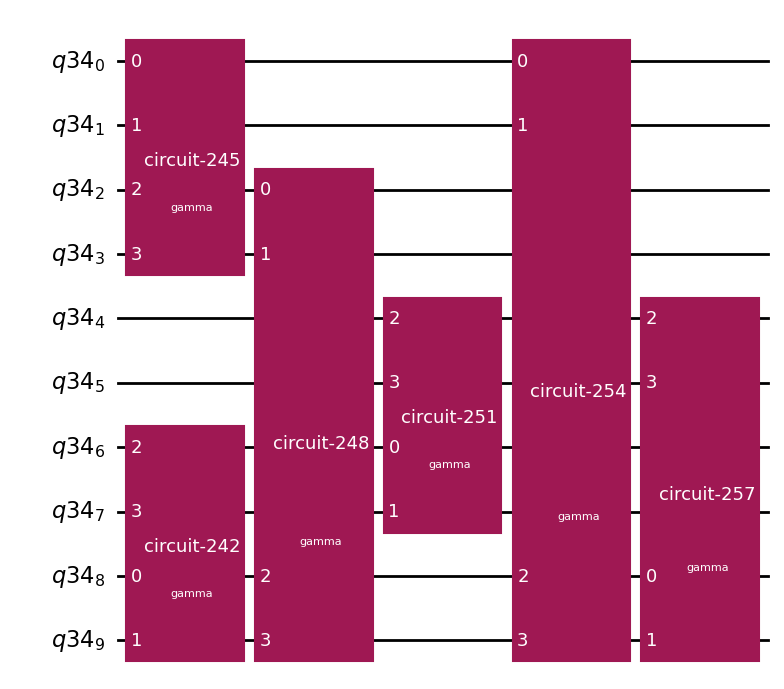

In [17]:
qaoa.problem.circuit.draw("mpl")

The cost landscape is sampled using angles $\gamma, \beta$ $\in$ $[0, \frac{\pi}{2}]$ on a $10\times10$ grid.

2025-06-12 16:10:39 [info     ] Calculating energy landscape for depth p=1... file=qaoa.qaoa func=sample_cost_landscape
2025-06-12 16:10:39 [info     ] Executing sample_cost_landscape file=qaoa.qaoa func=sample_cost_landscape
2025-06-12 16:10:39 [info     ] parameters: 2                  file=qaoa.qaoa func=sample_cost_landscape
2025-06-12 16:10:39 [info     ] Done execute                   file=qaoa.qaoa func=sample_cost_landscape
2025-06-12 16:10:39 [info     ] Done measurement               file=qaoa.qaoa func=sample_cost_landscape
2025-06-12 16:10:39 [info     ] Calculating Energy landscape done file=qaoa.qaoa func=sample_cost_landscape


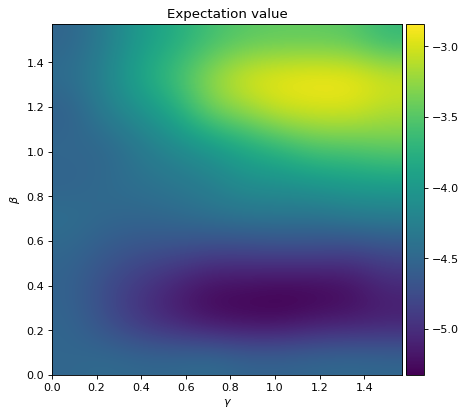

In [18]:
qaoa.sample_cost_landscape(
    angles={"gamma": [0, np.pi / 2, 10], "beta": [0, np.pi / 2, 10]}
)
plot_E(qaoa)

In [19]:
qaoa.optimize(depth=1)

2025-06-12 16:10:40 [info     ] cost(depth 1 = -5.397460937500004 file=qaoa.qaoa func=optimize


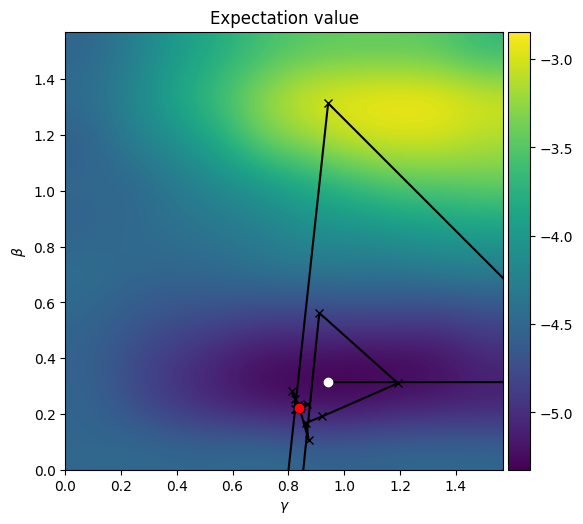

In [20]:
fig = pl.figure(figsize=(6, 6))
gamma = []
beta = []
angles = qaoa.optimization_results[1].angles
for i in range(len(angles)):
    gamma.append(angles[i][0])
    beta.append(angles[i][1])
pl.plot(gamma, beta, "x-k")
pl.plot(gamma[0], beta[0], "wo")
pl.plot(gamma[-1], beta[-1], "or")
plot_E(qaoa, fig=fig)

plot how the expectation value changes during optimization

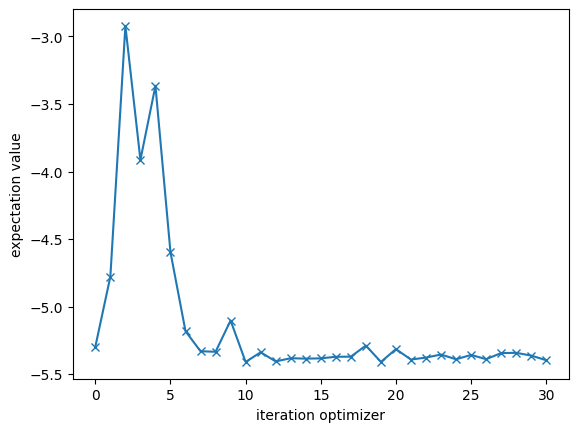

In [21]:
pl.plot(qaoa.optimization_results[1].Exp, "x-")
_ = pl.ylabel("expectation value")
_ = pl.xlabel("iteration optimizer")